# import libraries

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import the dataset

In [147]:
df = pd.read_csv('Rainfall.csv')

# check the shape of the df

In [148]:
# number of rows
print(f'Number of rows: {df.shape[0]}')

# number of columns
print(f'Number of columns: {df.shape[1]}')

Number of rows: 366
Number of columns: 12


# check the dataset

In [149]:
df

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


# check for missing values nan-null

In [150]:
df.isnull().mean() * 100

day                       0.000000
pressure                  0.000000
maxtemp                   0.000000
temparature               0.000000
mintemp                   0.000000
dewpoint                  0.000000
humidity                  0.000000
cloud                     0.000000
rainfall                  0.000000
sunshine                  0.000000
         winddirection    0.273224
windspeed                 0.273224
dtype: float64

# replace nan-null values with the mean value

In [151]:
def mean_value(dataframe):
    for column in dataframe.columns:
        if dataframe[column].dtype == 'float' or dataframe[column].dtype == 'int':
            if dataframe[column].isnull().mean() * 100 > 0:
                mean = dataframe[column].mean()
                dataframe[column] = dataframe[column].fillna(mean)

In [152]:
# apply the function
mean_value(df)

# Convert rainfall values (target column) to numerical

In [153]:
# import label encoder
from sklearn.preprocessing import LabelEncoder

# create an instance of label encoder
le = LabelEncoder()

df['rainfall'] = le.fit_transform(df['rainfall'])

In [154]:
df['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

# Rename columns

In [170]:
# rename columns with redundant spaces
df.rename(columns={'pressure ': 'pressure', 'humidity ': 'humidity', 'cloud ': 'cloud',
                   '         winddirection': 'winddirection', 'temparature': 'temperature'}, inplace=True)

# check the correlation among the temp columns

In [172]:
correlation_matrix = df[['maxtemp', 'temperature', 'mintemp']].corr()
print(correlation_matrix)

              maxtemp  temperature   mintemp
maxtemp      1.000000     0.986193  0.961534
temperature  0.986193     1.000000  0.990187
mintemp      0.961534     0.990187  1.000000


# drop maxtemp and mintemp, because their values are almost the same like temperature column

In [173]:
df.drop(['maxtemp', 'mintemp'], axis=1, inplace=True)

# Plots

<Axes: xlabel='rainfall', ylabel='cloud'>

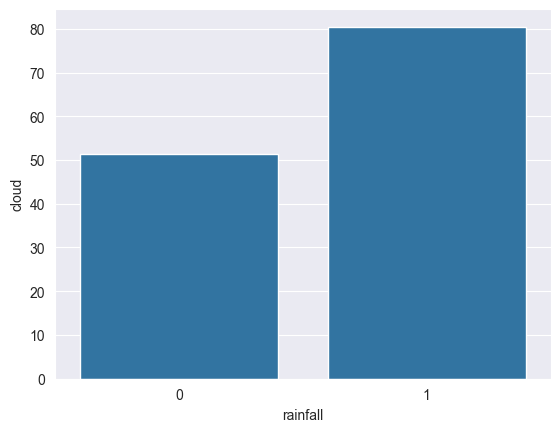

In [160]:
sns.barplot(data=df, x='rainfall', y='cloud', errorbar=None)

<Axes: xlabel='rainfall', ylabel='temperature'>

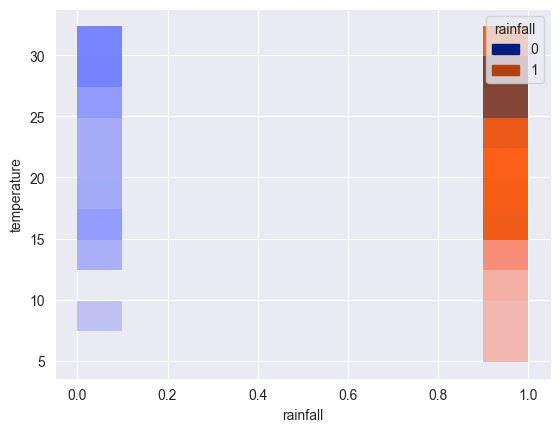

In [177]:
sns.histplot(data=df, x='rainfall', y='temperature', palette='dark', hue='rainfall')

<Axes: xlabel='rainfall', ylabel='count'>

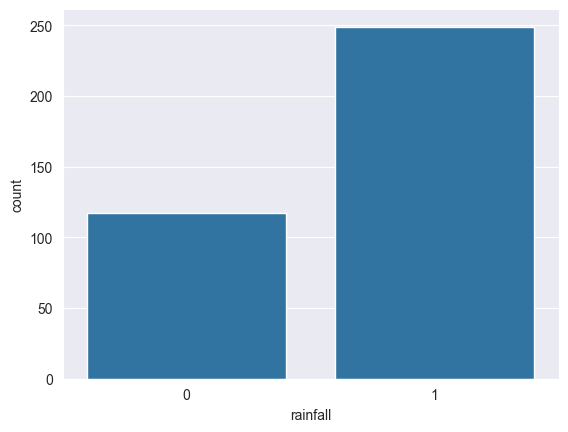

In [167]:
sns.countplot(data=df, x='rainfall')

In [179]:
df

,day,pressure,temperature,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,18.3,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,18.9,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,19.3,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,20.6,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,20.7,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,17.7,15.0,84,90,1,0.0,30.0,18.4
362,28,1026.6,17.3,12.8,75,85,1,1.0,20.0,25.9
363,29,1025.9,17.7,13.3,75,78,1,4.6,70.0,33.4
364,30,1025.3,17.3,13.3,78,86,1,1.2,20.0,20.9


<Figure size 1200x800 with 0 Axes>

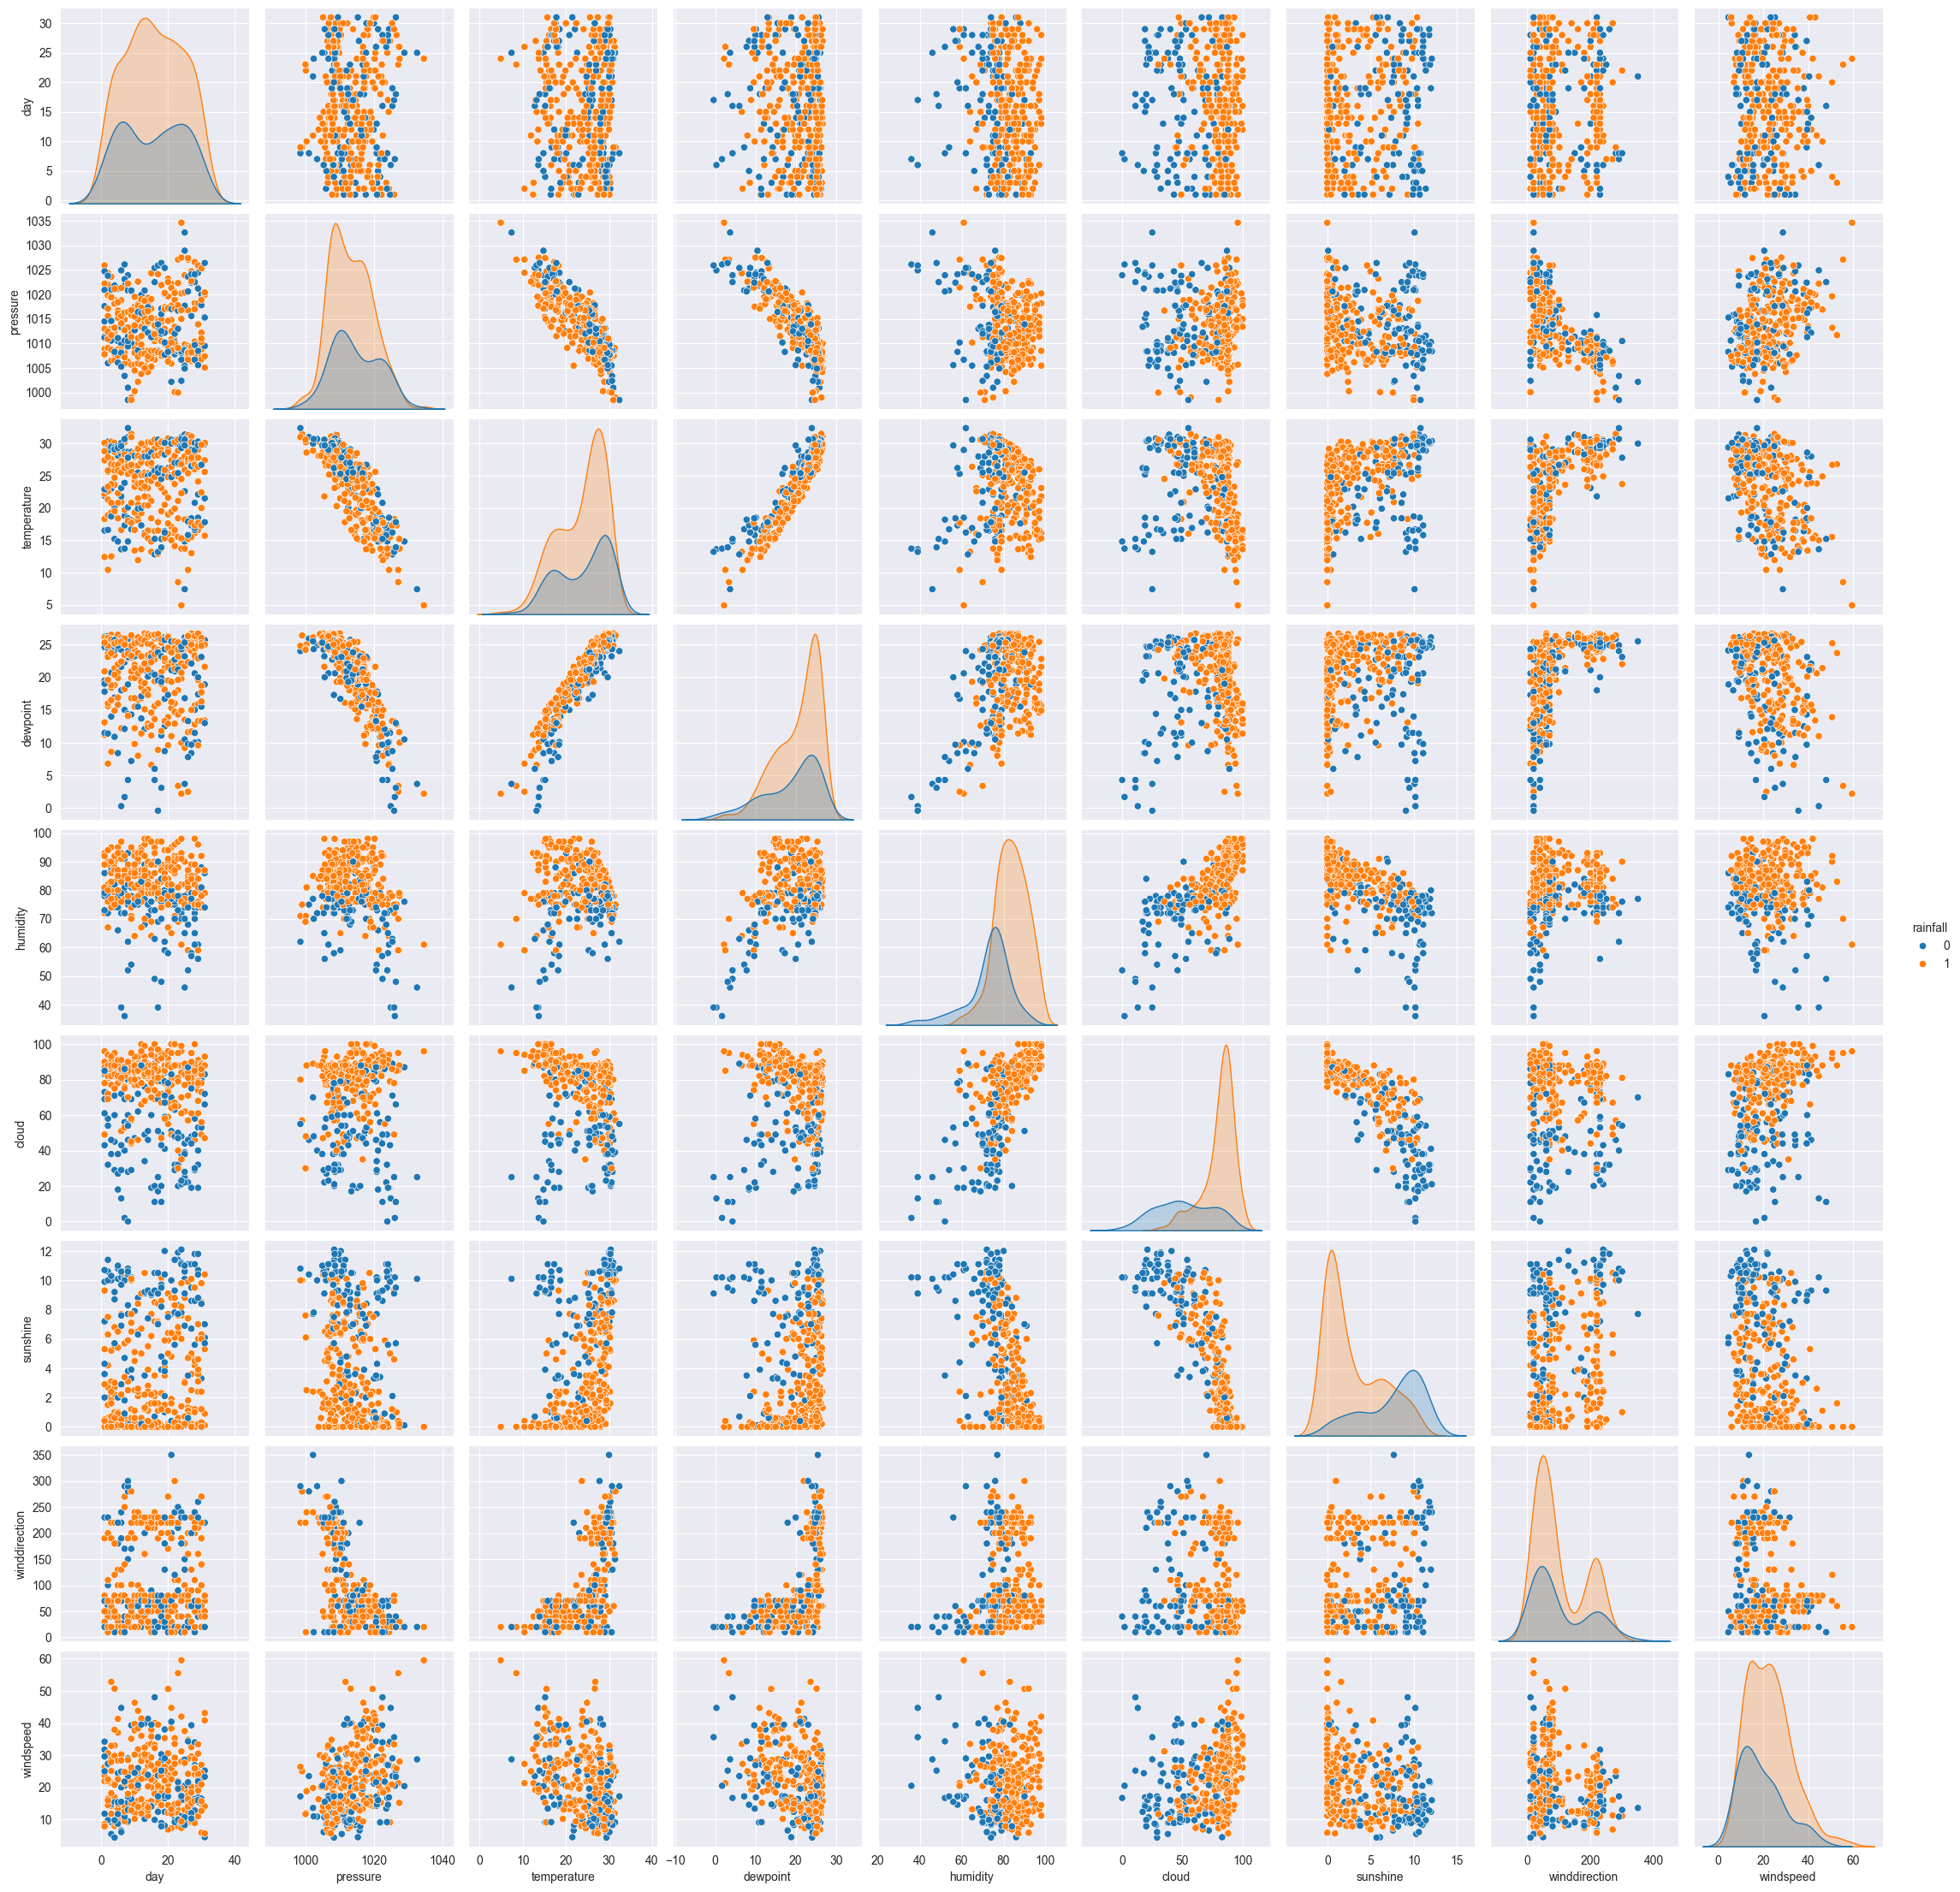

In [183]:
plt.figure(figsize=(12, 8))
sns.pairplot(data=df, hue='rainfall')

<Axes: xlabel='rainfall', ylabel='humidity'>

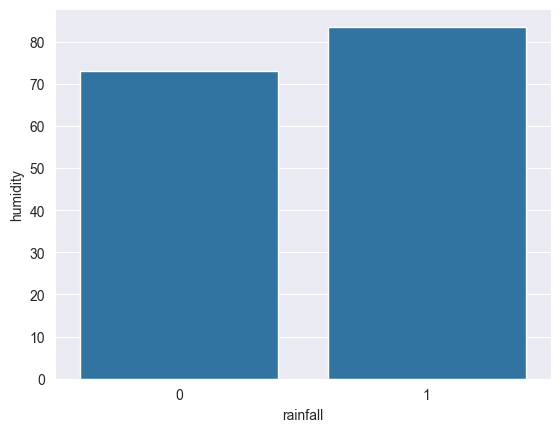

In [188]:
sns.barplot(data=df, x='rainfall', y='humidity', errorbar=None)

<Axes: xlabel='rainfall', ylabel='sunshine'>

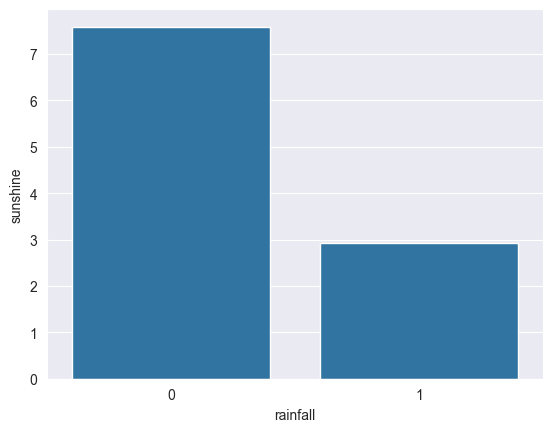

In [190]:
sns.barplot(data=df, x='rainfall', y='sunshine', errorbar=None)

# split the dataset

In [191]:
# import train_split function
from sklearn.model_selection import train_test_split

# all columns except the target column
X = df.drop('rainfall', axis=1)

# target column
y = df['rainfall']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [197]:
# import Logistic Regression model
from sklearn.linear_model import LogisticRegression

# create an instance of logistic regression model
lr = LogisticRegression(max_iter=350)

# fit the model
lr.fit(X_train, y_train)

LogisticRegression(max_iter=350)

# Predictions

In [198]:
predictions = lr.predict(X_test)

# Metrics

In [199]:
# import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

accuracy = accuracy_score(y_test, predictions)

print(f'Logistic Regression accuracy: {accuracy}')
print()
print(confusion_matrix(y_test, predictions))
print()
print(classification_report(y_test, predictions))

Logistic Regression accuracy: 0.7972972972972973

[[11 12]
 [ 3 48]]

              precision    recall  f1-score   support

           0       0.79      0.48      0.59        23
           1       0.80      0.94      0.86        51

    accuracy                           0.80        74
   macro avg       0.79      0.71      0.73        74
weighted avg       0.80      0.80      0.78        74



# KNN model

In [200]:
# import KNN model
from sklearn.neighbors import KNeighborsClassifier

# create an instance of KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [201]:
# predictions
predictions = knn.predict(X_test)

In [202]:
# metrics

accuracy = accuracy_score(y_test, predictions)
print(f'KNN accuracy: {accuracy}')

print()

print(confusion_matrix(y_test, predictions))
print()
print(classification_report(y_test, predictions))

KNN accuracy: 0.7837837837837838

[[10 13]
 [ 3 48]]

              precision    recall  f1-score   support

           0       0.77      0.43      0.56        23
           1       0.79      0.94      0.86        51

    accuracy                           0.78        74
   macro avg       0.78      0.69      0.71        74
weighted avg       0.78      0.78      0.76        74



# Naive Bayes model

In [203]:
# import NB model
from sklearn.naive_bayes import GaussianNB

# create an instance of NB
nb = GaussianNB()

# fit the model
nb.fit(X_train, y_train)

GaussianNB()

In [204]:
# predictions
predictions = nb.predict(X_test)

In [205]:
# metrics

accuracy = accuracy_score(y_test, predictions)
print(f'KNN accuracy: {accuracy}')

print()

print(confusion_matrix(y_test, predictions))
print()
print(classification_report(y_test, predictions))

KNN accuracy: 0.7702702702702703

[[12 11]
 [ 6 45]]

              precision    recall  f1-score   support

           0       0.67      0.52      0.59        23
           1       0.80      0.88      0.84        51

    accuracy                           0.77        74
   macro avg       0.74      0.70      0.71        74
weighted avg       0.76      0.77      0.76        74



# SVM model

In [206]:
# import SVM model
from sklearn.svm import SVC

# create an instance of SVM model
svc = SVC()

# fit the model
svc.fit(X_train, y_train)

SVC()

In [207]:
# predictions
predictions = svc.predict(X_test)

In [208]:
# metrics

accuracy = accuracy_score(y_test, predictions)
print(f'KNN accuracy: {accuracy}')

print()

print(confusion_matrix(y_test, predictions))
print()
print(classification_report(y_test, predictions))

KNN accuracy: 0.6891891891891891

[[ 0 23]
 [ 0 51]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.69      1.00      0.82        51

    accuracy                           0.69        74
   macro avg       0.34      0.50      0.41        74
weighted avg       0.47      0.69      0.56        74



C:\Users\nick-\PycharmProjects\pythonProject1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nick-\PycharmProjects\pythonProject1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nick-\PycharmProjects\pythonProject1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f